<a name='0'></a>

# Basic Image Classification with Artificial Neural Networks

### What's in here: 

* [1. What is Image Classification?](#1)
* [2. Types of Image Classification Problems](#3)
* [3. Popular Image Classification Datasets](#3)
* [4. Typical Hyperparameters for Image Classification Problems](#4)
* [5. Image Classification in Practice](#5)
    * [5.1 Gathering Data](#5-1)
    * [5.2 Looking in the Data](#5-2)
    * [5.3 Preparing the Data](#5-3)
    * [5.4 Creating and Training Model](#5-4)
    * [5.5 Visualizing the Results](#5-5)
    * [5.6 Evaluating the Model](#5-6)
* [6. Final Notes](#6)

<a name='1'></a>
## 1. What is Image Classication?

Image Classification is one of the most popular and important computer vision tasks nowdays. 

In essence, image classification is about identifying or determining the specific category of a given image from different categories. 

Take an example: Given a picture of a car, can you write a computer program to recognize if the image is a car?

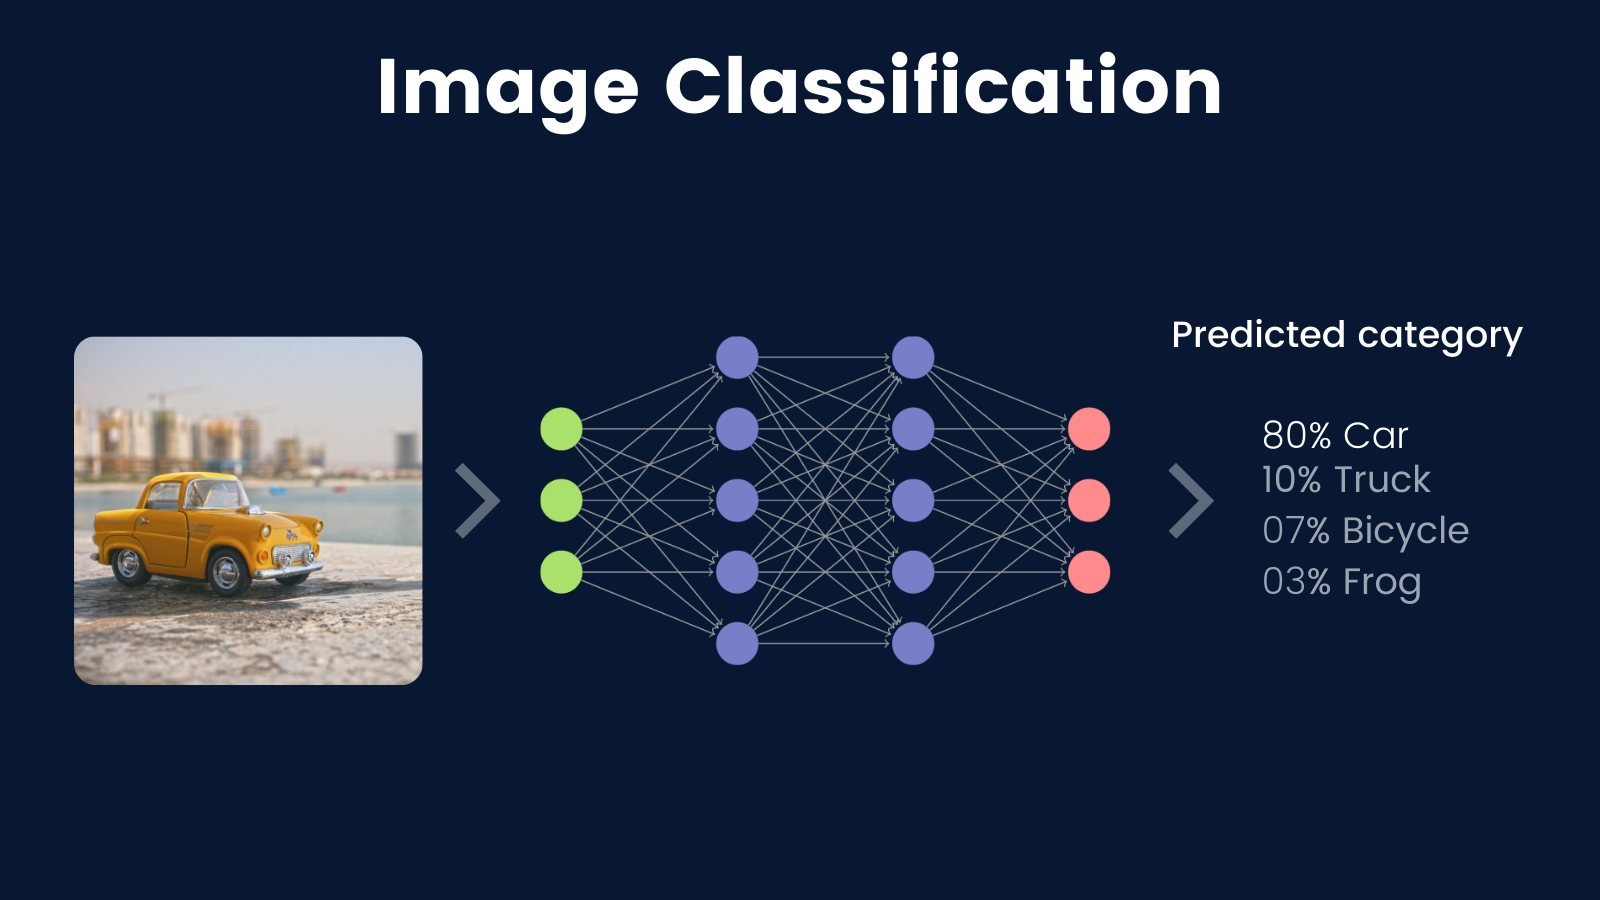

For humans, identifying or recognizing objects is a trivial task. The human visual perception system is very innate and it take us fractions of milliseconds to recognize images. 

But for computers, it's a different story. When we look at the image, we see what's in it. Conversely, computers only see numbers or pixel values. Image are just numbers. 




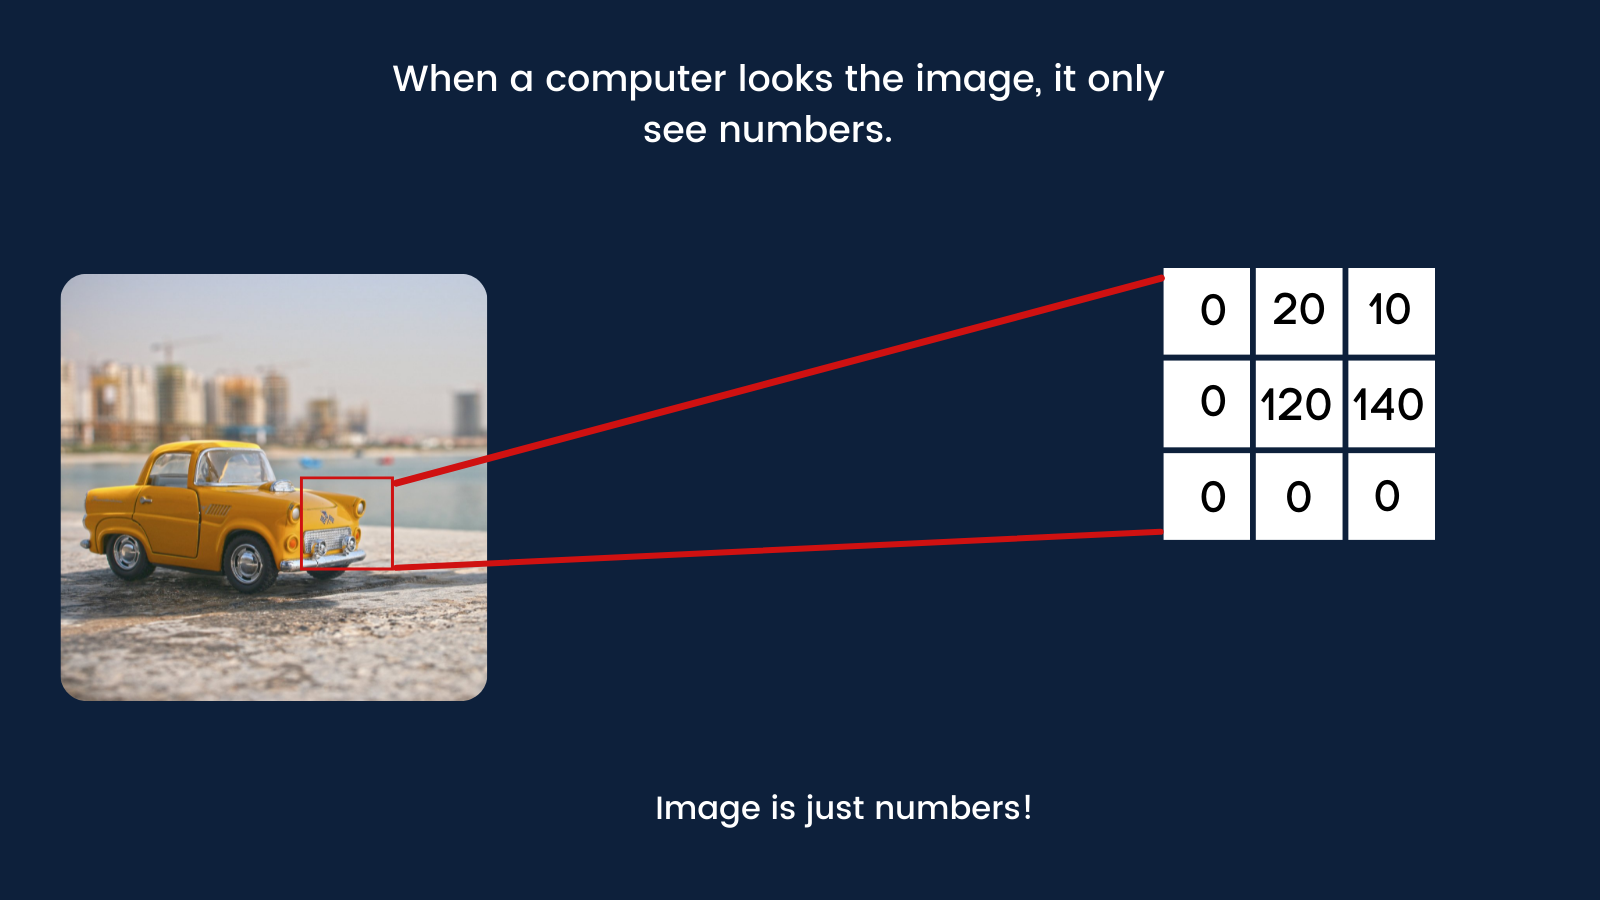



The fact that computers only see numbers makes it hard to accurately recognize similar images that are in different conditions such as color differences, scene differences and many more varieties.That is the reason why we have to show them bunch of images in different scenarios and what they represent so they can learn to identify these particular images.

Image classification has enabled many real world applications. Take an example for things like medical diseases diagnosis, where we may take a medical scan image and identify the presence of a given disease in the image. Image classification is also useful in many more tasks such as crops classification, foods classification, products tagging, visual similarity search, face recognition, etc...

Image classification is also the backbone of other computer vision tasks such as object detection. Object detection involve recognizing the objects in image(classification) and localizing them or drawing the bounding boxes around them. 

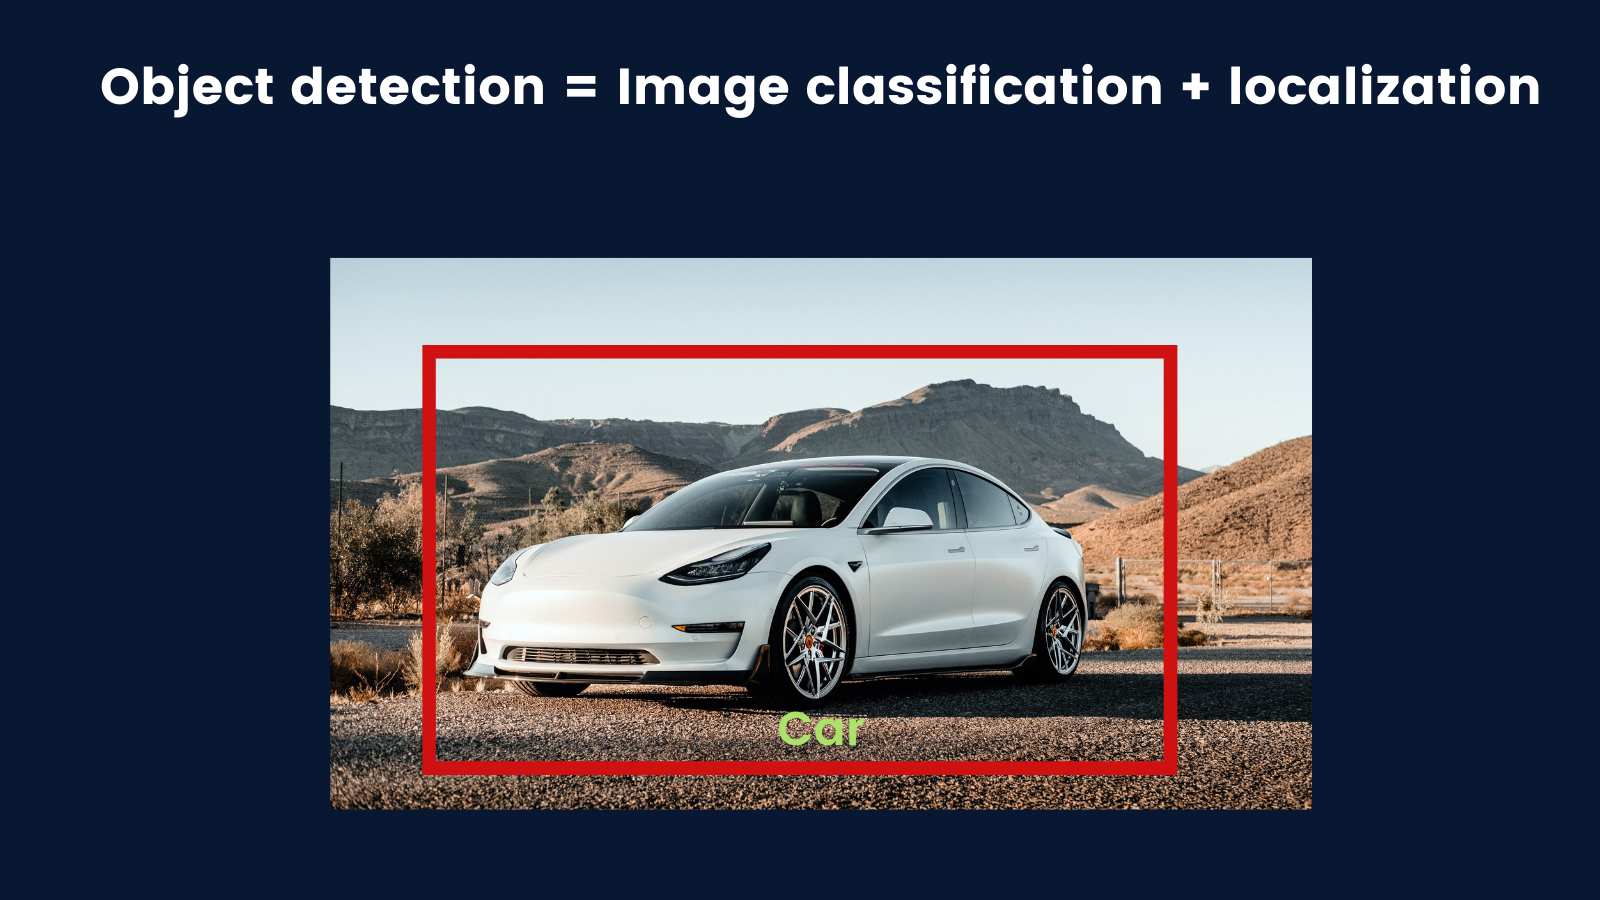

## 2. Types of Image Classification Problems

There are 3 main broad types of image classication problems:        

* Binary image classification where you have 2 categories such as cats and dogs classification. In binary classification, each image is either a cat or dog. 

* Multi-label image classification is another type of classification in which a given object may belong to more than one category or class. 

* Multiclass classification is also another common classification type that involve determining the category of image from multiple number of categories. 
Most of the problems that we will solve in this course belong to this category because it's bit more challenging.  

## 3. Popular Image Classification Datasets

In this section, we will review some popular image classification datasets.

#### MNIST

MNIST is one of the popular image classification datasets. There are two kinds of MNIST dataset that are [fashions mnist](https://github.com/zalandoresearch/fashion-mnist) and [handwritten digits](http://yann.lecun.com/exdb/mnist/).

Both Fashion MNIST and Handritten digits contain 60,000 images for training and 10,000 images for testing. Each image in MNIST is 28X28 grayscale. The number of labels or categories in MNIST is 10.



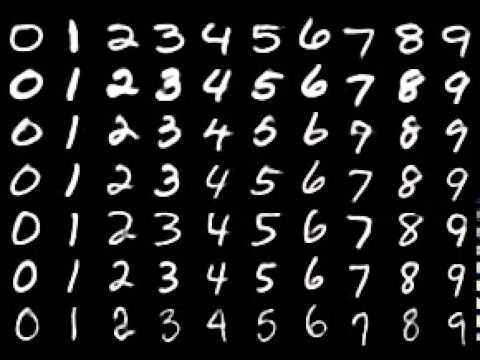

!['Fashion Dataset'](https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png)

Git source: [MNIST Repo](https://github.com/zalandoresearch/fashion-mnist). 

MNIST dataset is so easy. Here are some funny quotes about it: 

> "If it doesn't work on MNIST, it won't work at all. Well, if it does work on MNIST, it may still fail on others." - Researchers

> Everything works on MNIST - Justin Johnson. 

Most popular deep learning frameworks provide easy ways to get mnist dataset.

```
import tensorflow as tf
import tensorflow_datasets as tfds

# Loading MNIST from TensorFlow Datasets

(train_data, test_data), info = tfds.load('fashion_mnist', with_info=True, split=('train', 'test'))

#Loading MNIST from Keras Datasets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
```

#### Cats and Dogs Dataset

Cats and Dogs is one of the popular image datasets that almost everybody working in vision knows about. 

The dataset contains 25000 images of different sizes. 

Cats and dogs dataset is not available in Keras, but it's available in [TensorFlow Datasets](https://www.tensorflow.org/datasets/catalog/cats_vs_dogs). 

You can learn more about this dataset on [Kaggle](https://www.kaggle.com/c/dogs-vs-cats/data). 


#### Cifar10 



Cifar10 is also a popular image classification dataset that is widely used in machine learning research community and education materials. 

Cifar10 contains 50,000 training and 10,000 testing images in 10 classes or categories. Each image in cifar10 is 32X32 RGB.

With the exception of this notebook that will use MNIST, other notebooks will use complex datasets like Cifar10.

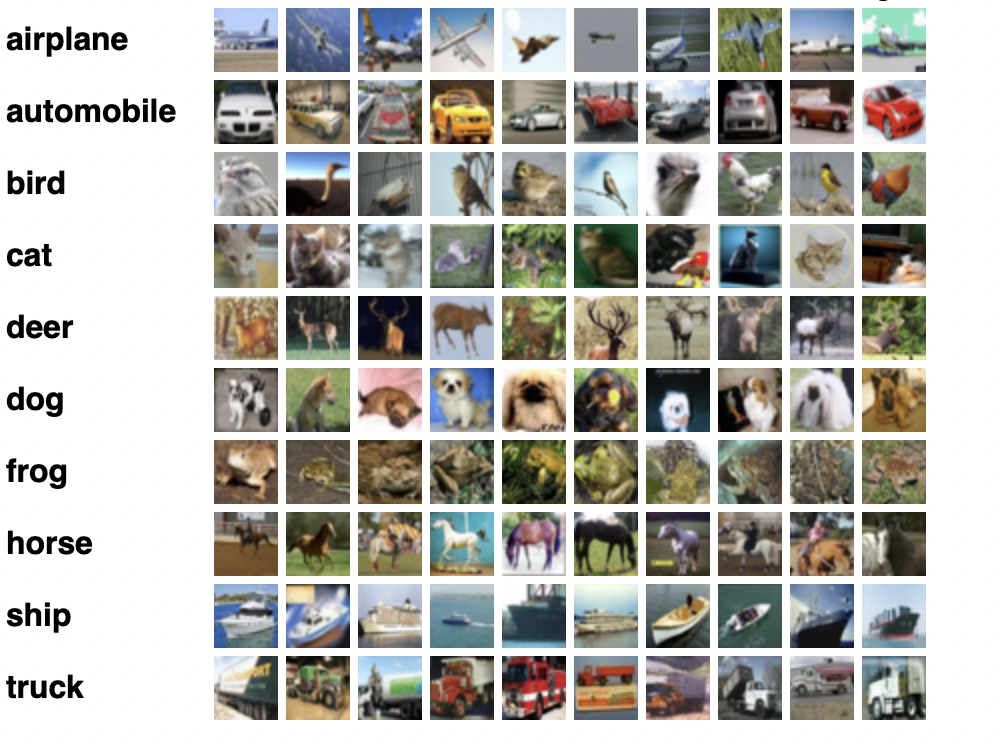

Screencast: [source](https://www.cs.toronto.edu/~kriz/cifar.html).

Cifar10 is also available in TensorFlow and Keras.

```
# Cifar10 from TensorFlow Datasets
(train_data, test_data), info = tfds.load('cifar10', split=['train','test'), as_supervised=True, with_info=True)

# Cifar10 from Keras Datasets 

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
```

There is a new test for cifar10 that addressed distribution shift in the orginal dataset. If interested, check the [new test set](https://github.com/modestyachts/CIFAR-10.1) and the [paper](https://arxiv.org/abs/1806.004510) that introduced it. 

There is also a bigger version of Cifar10 called [Cifar100](https://keras.io/api/datasets/cifar100/). 

#### ImageNet

ImageNet is a popular image classification dataset that contains 1000 classes. ImageNet is a very big and challenging dataset that is often used for testing new algorithms. 

It contains 1.3M training images, 50,000 validation images, and 100,000 testing images. 

Training computer vision models on ImageNet is very computationally expensive because it is big. For such reason, we will not use it in labs but some of the big pretrained models that we will use were trained on such dataset.

ImageNet was also used in ImageNet Large Scale Visual Recognition Challenge (ILSVRC). This is the challenge that contributed to the rapid development of deep learning and computer vision. You can learn more about the challenge [here](https://image-net.org/challenges/LSVRC/index.php). 


There are many more other image classification datasets. Check some of them in [Tensorflow Dataset](https://www.tensorflow.org/datasets/catalog/overview#image_classification).

## 4. Typical Hyperparamaters for Image Classification Problems and Hyperparameter Optimization Techniques

In previous sections, we saw different types of classification problems that are binary, multi-label, and multi-class classification problems.

There are different suites of hyperparamaters for those types. The hyperparameters for neural networks can be: number of layers, number of units in a layer, activation functions, optimizer, loss function, and performance metrics. Although there are no clear or exact hyperparamaters for every problem, we can try to draw some ranges of values or hyperparameters that should come in handy first. 

Below table summarize the commonly used hyperparameters and their ranges.

| **Hyperparameter** | **Binary classifier** | **Multilabel binary classifier** | **Multiclass classifier** |
| --- | --- | --- |--- |
| **Neurons at input layer** | depend on the problem |depend on the problem|depend on the problem
| **No of hidden layer(s)** | depend on problem, usually from 1-10 |Same as ◁|Same as ◁
| **Neurons per hidden layer** | depend on problem, usually 10-100|Same as ◁ |Same as ◁
| **Neurons at output layer** | 1 |Neurons equivalent to number of labels |Neurons equivalent to number of classes
| **Activation in hidden layers**|Mostly Relu or its variants(LeakyReLU, SeLU| Same as ◁ | Same as ◁
| **Activation in output layer** |sigmoid | sigmoid | softmax
| **Loss function** |binary cross entropy |binary cross entropy | categorical cross entropy
| **Optimizer** | Mostly: SGD, Adam, RMSProp|Same as ◁|Same as ◁|

*Table: Typical values of hyperparameters in neural network classifiers*

### Hyperparameter Optimization Techniques

There are many hyperparameters in neural networks and manually finding the best values of each and each can nearly be impossible. Fortunately, there are tools that are suited for hyperparamater search such as [Keras Tuner](https://keras.io/api/keras_tuner/) and [Optuna](https://optuna.org).

Also, there are two popular techniques that are used for searching hyperparameters that are grid search and random search.

#### Grid Search

In grid search, we select several fixed values for each hyperparameter, and then we evaluate all of them. Finally, the value that gives the best performance of the neural network will be selected. 

The range of values or set of values to choose from is normally called a `search space`.

Example of grid search:

* Learning rate: [0.01, 0.003, 0.004, 0.005]
* Activation functions: ['relu', 'selu', 'elu']

Grid search is a preferred hyperparameter optimization technique for searching the values that are known to work well. Example are values of learning rate we put above. It is also computationally expensive. If you can afford it, make sure you run it on GPU.

#### Random Search

In random search, instead of trying fixed set of values like we do in grid search, we randomly search in a *range* of values. 


Example:    

* Learning rate: [0.001, 0.005]
* Dropout rate: [0.2, 0.7]

Random search is preferred when you want to discover the best values especially in hyperparameters that can have many different optimal values. 

As the 2012 [paper](https://www.jmlr.org/papers/volume13/bergstra12a/bergstra12a.pdf) "Random Search for Hyper-Parameter Optimization" noted, random search is effective than grid search. As it pointed out, we do not know ahead of time which subspace will be important. And thus, grid search is not a reliable hyperparameter optimization technique based on such judgement. 

Like grid search, random search is also computationally expensive and you if you don't have enough compute power, you should first try some agreeable values such as those that we showed in the table above, or the training framework we talked about in the previous notebook entilted `Introduction to Deep Learning`. You should also try hyperparameter optimization tools such as Keras Tuner and Optuna instead of doing it from scratch. Those tools also have optimization techniques we talked about. 

Let's put what we have learned so far into practice.

## 5. Image Classification in Practice

Disclaimer: The rest of this lab is purely based on this orginal [notebook](https://nbviewer.org/github/Nyandwi/machine_learning_complete/blob/main/8_deep_computer_vision_with_tensorflow/1_intro_to_computer_vision_and_cnn.ipynb) from [Complete Machine Learning Package](https://github.com/Nyandwi/machine_learning_complete).

### Imports

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# Print the version of the above frameworks

print("TensorFlow's version used in notebook:{}".format(tf.__version__))

TensorFlow's version used in notebook:2.7.0


<a name='5-1'></a>

## 5.1 Getting the Fashion data

Fashion MNIST data is made of 70.000 samples, 60.000 of them are allocated for training set and 10.000 for test set. Each image is 28X28, grayscale. 


!['Fashion Dataset'](https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png)


!['Embedding: Fashion Dataset'](https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/embedding.gif)

The fashions are of 10 categories. Below are their labels: 


| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

Image & gif of fashions shown above are borrowen from [dataset homepage](https://github.com/zalandoresearch/fashion-mnist)

Let's get the dataset from Keras.

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(fashion_train, fashion_train_label), (fashion_test, fashion_test_label) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


<a name='5-2'></a>

## 5.2 Visualizing the Data

As always, it is a best practice to peep into the images. 

Let's display the pixels values of a given image and its corresponding label. 

In [4]:
index = 10

# Get the pixels

fashion_train[index]

array([[  0,   0,   0,   0,   0,   0,   0,  11, 142, 200, 106,   0,   0,
          0,   0,   0,   0,   0,  85, 185, 112,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 152, 214, 217, 194, 236, 216, 187,
        149, 135, 153, 211, 217, 231, 205, 217, 188,  34,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  66, 185, 166, 180, 181, 190, 211, 221,
        197, 146, 198, 206, 191, 168, 190, 172, 188, 175,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 135, 153, 160, 175, 180, 170, 186, 187,
        190, 188, 190, 187, 174, 195, 185, 174, 161, 175,  59,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 161, 147, 160, 170, 178, 177, 180, 168,
        173, 174, 171, 185, 184, 185, 172, 171, 164, 174, 120,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2, 175, 146, 145, 168, 178, 181, 185, 180,
        184, 178, 179, 187, 191, 193, 190, 181, 171, 172, 158,   0,   0,
          0,   0],
       [  

In [5]:
# A list of label names

class_names = ['T-shirt/top', 'Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

This type of fashion is: T-shirt/top(0)


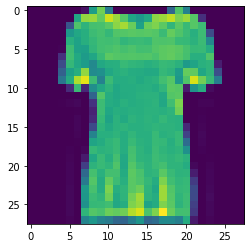

In [6]:
# Show the image

plt.imshow(fashion_train[index])

# Display the label

image_label = fashion_train_label[index]
print('This type of fashion is: {}({})'.format(class_names[image_label], image_label))

The fashions with the label 0 is `T-shirt/top`. Normally, the pixels of image range from 0 to 255. If you can look back where we displayed the pixels, you will see that they vary from 0 to 255. 

We can also visualize some random images. 

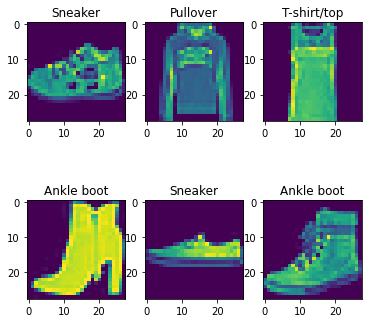

In [7]:
import random

plt.figure(figsize=(6,6))

for index in range(6):

  ax = plt.subplot(2,3, index+1)
  random_index = random.choice(range(len(fashion_train)))
  plt.imshow(fashion_train[random_index])
  plt.title(class_names[fashion_train_label[random_index]])

You can rerun the above cell to display different fashions. 

Another important thing to look at when working with images is to see their size. 

This is important because later when we will be creating a model, we have to specify the input shape and such shape is same as the shape of the images. Each image is 28*28, but let's verify that. 

In [8]:
# Getting the image shape

print('The shape of the whole training dataset:{}'.format(fashion_train[0].shape))
print('The shape of the first(and other)image:{}'.format(fashion_train[0].shape))

The shape of the whole training dataset:(28, 28)
The shape of the first(and other)image:(28, 28)


Now that we know the dataset that we are working with, let us do some few proprocessing before building a model. 

<a name='5-3'></a>

## 5.3 Preparing the Data

In many cases, real world images datasets are not that clean like fashion mnist. 

You may have to correct images that were incorrectly labeled, or you have labels in texts that need to be converted to numbers(most machine learning models accept numeric input), or scale the pixels values. 

The latter is what we are going to do. It is inarguable that scaling the images pixels to value between 0 and 1 increase the performance of the neural network, and hence the results. Let's do it!! 

As we have seen, the pixels range from 0 to 255. So we will divide both training and test set by 255.0. 

In [9]:
# Scaling the image pixels to be between 0 and 1

fashion_train = fashion_train/255.0

fashion_test = fashion_test/255.0

We are now ready to build a neural network. 

<a name='5-4'></a>

## 5.4 Creating, Compiling, and Training a Model

There are few points to note before creating a model:

* When working with images, the shape of the input images has to be correctly provided. This is a common error done by many people, including me sometime. We will not need to specify input shape of the images in this lab, but later in ConvNets, we will. In this lab instead, we will flatten the image pixels as the first thing in model building. 

* We have 10 classes. This is a multi-class classification problem.

* We will use `softmax` as activation in the last layer, 10 neurons or units because we have 10 fashions, and the loss will be  `SparseCategoricalCrossentropy` because the labels are pure integers. If the labels were in one hot format, we would use `CategoricalCrossentropy`. Learn more about Keras losses [here](https://keras.io/api/losses/probabilistic_losses/). 

Documentation is always the top source when learning all the possibilities of any framework. And also, Keras doc is beautifuly organized. Not to mention that the keras API is also well designed as well. 

**Important note**: There is no guarrantee that you will get the same results of the models implemented in the next sections. This is because neural networks (machine learning in general) are stochastic. In neural networks, weights are initialized randomly, and that means it's nearly impossible to get the same results everytime you rerun the model. 

In [10]:
# Creating a model

fashion_classifier = tf.keras.models.Sequential([
                                                 
        # Flattening layer will convert array of pixels into one dimensional column array                                        
       tf.keras.layers.Flatten(),
       tf.keras.layers.Dense(units=64, activation='relu'),
       tf.keras.layers.Dense(units=32, activation='relu'),
       tf.keras.layers.Dense(units=10, activation='softmax')                           

])

# Compiling a model: Specifying a loss and optimization function

fashion_classifier.compile(optimizer='adam',
                           loss='sparse_categorical_crossentropy',
                           metrics=['accuracy']
                           
)

Now that we built and compiled a model, we can train it. 

In order to train a model, we must have an input data and output(labels). We train the model to get the relationship between the input and output. Such relationship is what we tend to call rules. So, in other words, we provide the data and the answers to a model to get the rules. 

In [11]:
# Training a model
# Allocating 15% of training data to validation set

history = fashion_classifier.fit(fashion_train, fashion_train_label, epochs=20, validation_split=0.15)

Epoch 1/20
1594/1594 [==============================] - 5s 3ms/step - loss: 0.5275 - accuracy: 0.8114 - val_loss: 0.4312 - val_accuracy: 0.8459
Epoch 2/20
1594/1594 [==============================] - 4s 2ms/step - loss: 0.3857 - accuracy: 0.8614 - val_loss: 0.3742 - val_accuracy: 0.8677
Epoch 3/20
1594/1594 [==============================] - 4s 2ms/step - loss: 0.3487 - accuracy: 0.8718 - val_loss: 0.3651 - val_accuracy: 0.8708
Epoch 4/20
1594/1594 [==============================] - 3s 2ms/step - loss: 0.3256 - accuracy: 0.8795 - val_loss: 0.3433 - val_accuracy: 0.8764
Epoch 5/20
1594/1594 [==============================] - 3s 2ms/step - loss: 0.3092 - accuracy: 0.8844 - val_loss: 0.3377 - val_accuracy: 0.8751
Epoch 6/20
1594/1594 [==============================] - 4s 2ms/step - loss: 0.2930 - accuracy: 0.8915 - val_loss: 0.3567 - val_accuracy: 0.8744
Epoch 7/20
1594/1594 [==============================] - 3s 2ms/step - loss: 0.2826 - accuracy: 0.8950 - val_loss: 0.3459 - val_accuracy:

This was fast. When using Google Colab, you can speed up the training by changing the `runtime type`to `GPU`. You can head over `Runtime` in the `menu bar`>> Click on `Change runtime type`>>Choose `GPU`. 

But also, training mnist for 20 epochs is not slow that we would need to activate GPU. We will take an advantage of GPU in later labs. 

<a name='5-5'></a>

## 5.5 Visualizing the Model Results

Let's visualize the model results to see how training went. 

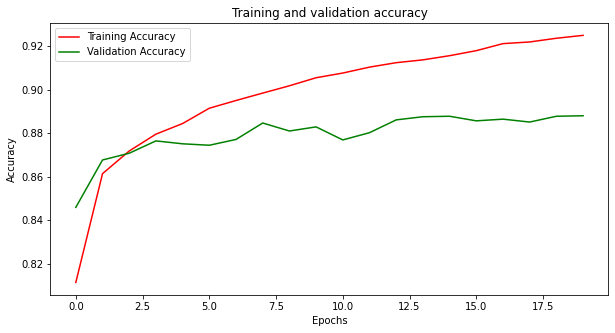

<Figure size 432x288 with 0 Axes>

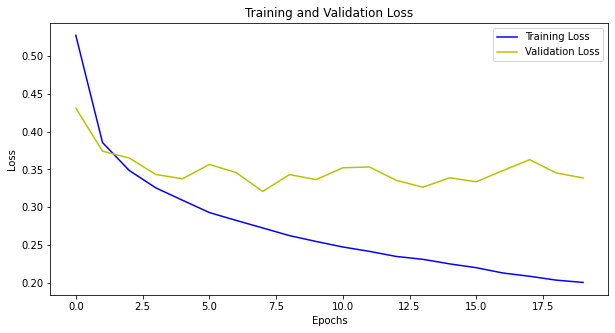

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = history.epoch

plt.figure(figsize=(10,5))
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc=0)

  # Create a new figure with plt.figure()
plt.figure()

plt.figure(figsize=(10,5))
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'y', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc=0)
plt.show()

At the end of the training, the accuracy is about 92% while validation accuracy being 88% or so. That's not bad considering that we built a simple model and trained for only 20 epochs, but we are clearly overfitting. In the next notebooks, we will learn how to overcome overfitting.

Forgetting tha we are overfitting, Let's shamelessly see how the model performs on unseed data: test set.

<a name='5-6'></a>

## 5.6 Model Evaluation

In [13]:
# Evaluating the model on unseen data

eval = fashion_classifier.evaluate(fashion_test, fashion_test_label)

# Printing the loss and accuracy 

print('Test loss: {}\nTest accuracy:{}'.format(eval[0],eval[1]))

313/313 [==============================] - 0s 1ms/step - loss: 0.3590 - accuracy: 0.8817
Test loss: 0.35896480083465576
Test accuracy:0.8816999793052673


The fashion classifier that we built is 87.7% confident at recognizing unseen fashion. 

We could also find other Classification metrics based on True/False positives & negatives such as precision and recall.

<a name='6'></a>

## 6 Final Notes

This is the end of the notebook that was about image classification with basic artificial neural network.

In the next part, we will learn about convolutional neural networks, which is a suitable network for image recognition tasks.

### [BACK TO TOP](#0)